In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data recieved by DStream
# df = pd.read_csv('./DStreams/DStream_at_2020-03-26150132.csv')
df = pd.read_csv('./DStreams/DStream_at_2020-03-26150132.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'TimeStamp', 'RT_Temp', 'ST_Temp'], dtype='object')

In [4]:
df['0'] = pd.to_datetime(df['TimeStamp'])
df.index = df['TimeStamp']
type(df['TimeStamp'])
df.index.max()

'2020-03-26 15:01:29'

In [5]:
df = df.drop(labels = '0',axis=1)
df = df.drop(labels = 'TimeStamp',axis=1)
df = df.drop(labels = 'Unnamed: 0',axis=1)

In [238]:
df.head()

,RT_Temp,ST_Temp
TimeStamp,,
2020-03-26 15:01:00,2.379055,-1.870722
2020-03-26 15:01:01,2.957222,-0.517855
2020-03-26 15:01:02,-0.557631,-1.211852
2020-03-26 15:01:03,-2.906739,-0.667527
2020-03-26 15:01:04,-3.821344,-1.980428


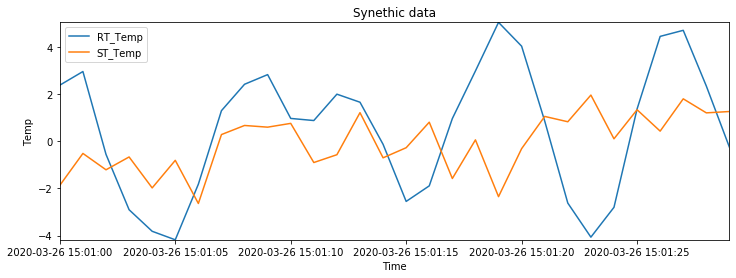

In [239]:
# ylable='srcs'
ax = df.plot(title='Synethic data',figsize = (12,4))
ax.autoscale(axis='both',tight=True)
ax.set(xlabel = 'Time',ylabel='Temp');

In [240]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

In [241]:
df.shape

(30, 2)

In [242]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [243]:
adf_test(df['RT_Temp'],title='RT_Temp')

Augmented Dickey-Fuller Test: RT_Temp
ADF test statistic     -7.353972e+00
p-value                 9.891121e-11
# lags used             1.000000e+00
# observations          2.800000e+01
critical value (1%)    -3.688926e+00
critical value (5%)    -2.971989e+00
critical value (10%)   -2.625296e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [244]:
adf_test(df['ST_Temp'],title='ST_Temp')

Augmented Dickey-Fuller Test: ST_Temp
ADF test statistic      -1.862476
p-value                  0.349914
# lags used              1.000000
# observations          28.000000
critical value (1%)     -3.688926
critical value (5%)     -2.971989
critical value (10%)    -2.625296
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [245]:
df_transformed = df.diff()

In [246]:
df_transformed

,RT_Temp,ST_Temp
TimeStamp,,
2020-03-26 15:01:00,NaN,NaN
2020-03-26 15:01:01,0.578167,1.352868
2020-03-26 15:01:02,-3.514853,-0.693997
2020-03-26 15:01:03,-2.349109,0.544325
2020-03-26 15:01:04,-0.914605,-1.312900
2020-03-26 15:01:05,-0.361015,1.169443
2020-03-26 15:01:06,2.359722,-1.830201
2020-03-26 15:01:07,3.119132,2.923761
2020-03-26 15:01:08,1.120025,0.385853


In [247]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['RT_Temp'], title='RT_TempFirstDiff')
print()
adf_test(df_transformed['ST_Temp'], title='ST_TempFirstDiff')

Augmented Dickey-Fuller Test: RT_TempFirstDiff
ADF test statistic      -3.643526
p-value                  0.004981
# lags used              8.000000
# observations          20.000000
critical value (1%)     -3.809209
critical value (5%)     -3.021645
critical value (10%)    -2.650713
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: ST_TempFirstDiff
ADF test statistic      -4.268887
p-value                  0.000503
# lags used              3.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [248]:
df_transformed.head()

,RT_Temp,ST_Temp
TimeStamp,,
2020-03-26 15:01:01,0.578167,1.352868
2020-03-26 15:01:02,-3.514853,-0.693997
2020-03-26 15:01:03,-2.349109,0.544325
2020-03-26 15:01:04,-0.914605,-1.312900
2020-03-26 15:01:05,-0.361015,1.169443


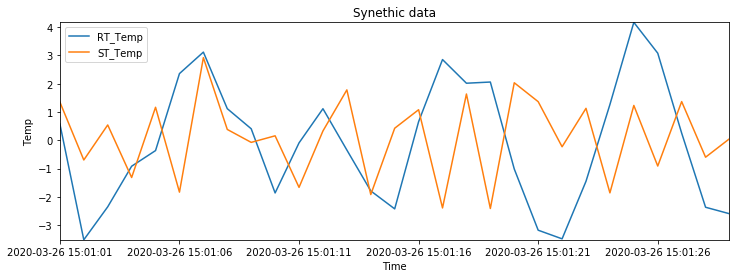

In [249]:
# ylable='srcs'
ax = df_transformed.plot(title='Synethic data',figsize = (12,4))
ax.autoscale(axis='both',tight=True)
ax.set(xlabel = 'Time',ylabel='Temp');

In [250]:
nobs = 6
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]
print(train.shape)
print(test.shape)

(23, 2)
(6, 2)


In [251]:
# VAR Model Order Selection
# Fit a series of models using the first 5 p-values, 
#and base our final selection on the model that provides the lowest AIC and BIC scores.

In [252]:
for i in [1,2,3,4,5]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  1.8497041143983373
BIC:  2.1472611471324234

Order = 2
AIC:  1.536132871557802
BIC:  2.0335245085689557

Order = 3
AIC:  1.8960239505866334
BIC:  2.593036542074427

Order = 4
AIC:  1.1469417997966371
BIC:  2.041673464270107

Order = 5
AIC:  0.9100239832699248
BIC:  1.9982561318096819



In [110]:
model.endog_names

['RT_Temp', 'ST_Temp']

In [253]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 27, Mar, 2020
Time:                     03:11:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.99826
Nobs:                     18.0000    HQIC:                   1.06008
Log likelihood:          -37.2720    FPE:                    3.70007
AIC:                     0.910024    Det(Omega_mle):         1.42547
--------------------------------------------------------------------
Results for equation RT_Temp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.179515         0.244620            0.734           0.463
L1.RT_Temp         0.519063         0.327918            1.583           0.113
L1.ST_Temp         0.089370         0.239299            0.373         

In [254]:
lag_order = results.k_ar
lagged_values = train.values[-lag_order:]
lagged_values

array([[ 2.06161461, -2.40842981],
       [-1.01092916,  2.03600094],
       [-3.17534561,  1.36756395],
       [-3.48103339, -0.22622197],
       [-1.44601287,  1.13177719]])

In [ ]:
lagged_values = train.values[-lag_order:]

In [255]:
fc = results.forecast(y=lagged_values,steps = 6)

In [256]:
fc

array([[  4.47025344,  -2.42091205],
       [  7.41521759,  -0.52131681],
       [  5.34918671,   0.30475798],
       [ -0.69651725,   0.01160967],
       [ -8.57805315,   3.06332402],
       [-10.10092854,   0.47675722]])

In [257]:
idx = pd.date_range(pd.Timestamp('2020-03-26 15:01:24'), periods = 6, freq='S')
idx = idx.strftime('%Y-%m-%d %H:%M:%S')

In [258]:
idx

Index(['2020-03-26 15:01:24', '2020-03-26 15:01:25', '2020-03-26 15:01:26',
       '2020-03-26 15:01:27', '2020-03-26 15:01:28', '2020-03-26 15:01:29'],
      dtype='object')

In [259]:
df_forecast = pd.DataFrame(data=fc, index=idx, columns=['RT_Temp_FC','ST_Temp_FC'])

In [260]:
df_forecast

,RT_Temp_FC,ST_Temp_FC
2020-03-26 15:01:24,4.470253,-2.420912
2020-03-26 15:01:25,7.415218,-0.521317
2020-03-26 15:01:26,5.349187,0.304758
2020-03-26 15:01:27,-0.696517,0.011610
2020-03-26 15:01:28,-8.578053,3.063324
2020-03-26 15:01:29,-10.100929,0.476757


# Inverting the Transformation

In [261]:
# Now build the forecast values from the first difference set
df_forecast['RT_Temp_Forecast'] = df['RT_Temp'].iloc[-nobs-1] + df_forecast['RT_Temp_FC'].cumsum()

In [262]:
# Now build the forecast values from the first difference set
df_forecast['ST_Temp_Forecast'] = df['ST_Temp'].iloc[-nobs-1] + df_forecast['ST_Temp_FC'].cumsum()

In [263]:
df_forecast

,RT_Temp_FC,ST_Temp_FC,RT_Temp_Forecast,ST_Temp_Forecast
2020-03-26 15:01:24,4.470253,-2.420912,0.400329,-0.463001
2020-03-26 15:01:25,7.415218,-0.521317,7.815547,-0.984318
2020-03-26 15:01:26,5.349187,0.304758,13.164734,-0.679560
2020-03-26 15:01:27,-0.696517,0.011610,12.468216,-0.667950
2020-03-26 15:01:28,-8.578053,3.063324,3.890163,2.395374
2020-03-26 15:01:29,-10.100929,0.476757,-6.210765,2.872131


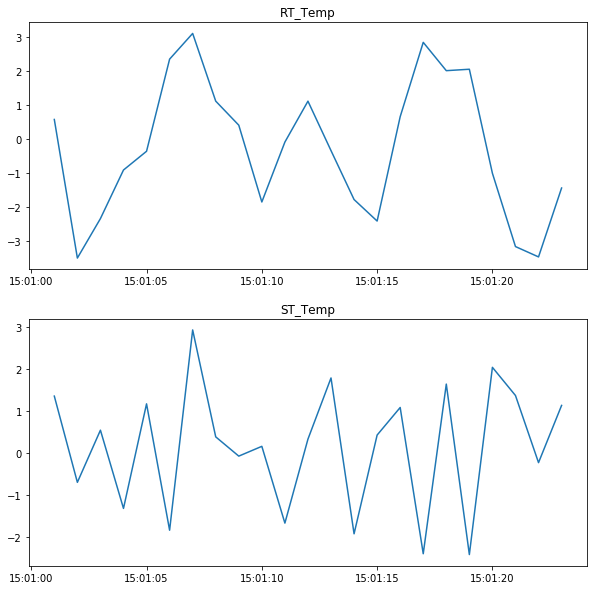

In [264]:
results.plot();

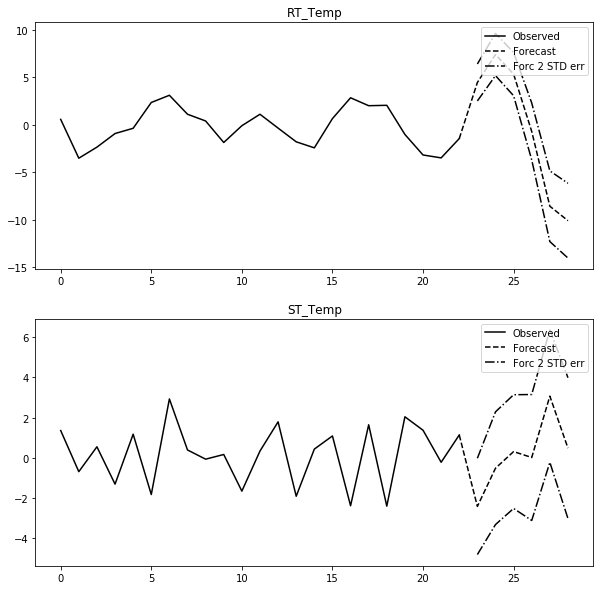

In [265]:
results.plot_forecast(6);

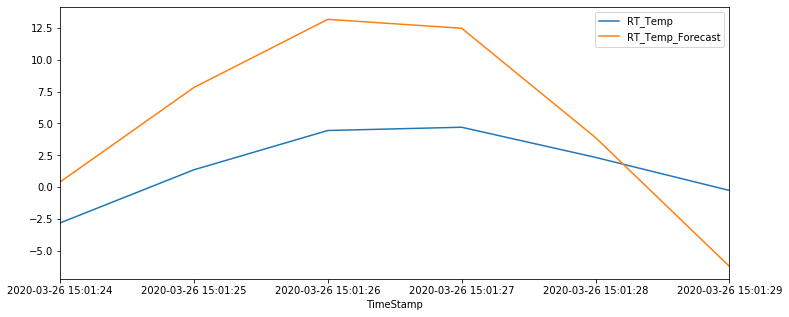

In [286]:
df['RT_Temp'][-nobs:].plot(figsize=(12,5),legend=True)
# df_forecast['RT_Temp_Forecast'].plot(legend=True);
# df['RT_Temp'][-nobs:].plot(figsize=(12,5),legend=True);
df_forecast['RT_Temp_Forecast'].plot(legend=True);

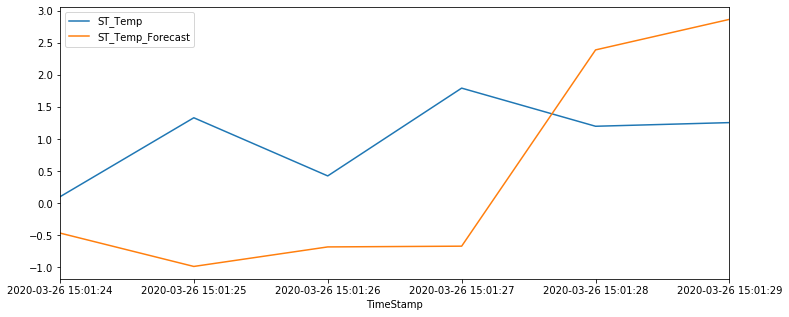

In [287]:
df['ST_Temp'][-nobs:].plot(figsize=(12,5),legend=True)
df_forecast['ST_Temp_Forecast'].plot(legend=True);

# Model Evaluation using RMSE

In [278]:
RMSE1 = rmse(df['RT_Temp'][-nobs:], df_forecast['RT_Temp_Forecast'])
Mean = df['RT_Temp'][-nobs:].mean()
print(f'RT_Temp RMSE: {RMSE1:.3f}')
print(f'RT_Temp Mean: {Mean:.3f}')

RT_Temp RMSE: 6.137
RT_Temp Mean: 1.634


In [279]:
RMSE2 = rmse(df['ST_Temp'][-nobs:], df_forecast['ST_Temp_Forecast'])
Mean = df['ST_Temp'][-nobs:].mean()
print(f'ST_Temp RMSE: {RMSE2:.3f}')
print(f'ST_Temp Mean: {Mean:.3f}')

ST_Temp RMSE: 1.685
ST_Temp Mean: 1.022
